# Climatology plts

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
clim_ecco = xr.open_dataset('/home/jovyan/WMT-project/ECCO-budgets/clim_ecco')
clim_soda = xr.open_dataset('/home/jovyan/WMT-project/SODA/clim_soda')
clim_sose = xr.open_dataset('/home/jovyan/WMT-project/SOSE-budgets/clim_sose')

In [3]:
clim_ecco

<xarray.Dataset>
Dimensions:              (sigma2_bin: 37, month: 12)
Coordinates:
  * sigma2_bin           (sigma2_bin) float64 1.037e+03 1.037e+03 ... 1.037e+03
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month, sigma2_bin) float64 ...
    psi_vel_clim         (month, sigma2_bin) float64 ...
    omega_clim           (month, sigma2_bin) float64 ...
    omega_mix__clim      (month, sigma2_bin) float64 ...
    omega_surf_slt_clim  (month, sigma2_bin) float64 ...
    omega_surf_th_clim   (month, sigma2_bin) float64 ...
    R1_clim              (month, sigma2_bin) float64 ...
    R2_clim              (month, sigma2_bin) float64 ...

In [4]:
bot_ecco = - clim_ecco.isel(sigma2_bin=-1) + clim_ecco.sel(sigma2_bin=0, method='nearest')
bot_soda = - clim_soda.isel(sigma2_bin=-1) + clim_soda.sel(sigma2_bin=0, method='nearest')
bot_sose = - clim_sose.isel(sigma2_bin=-1) + clim_sose.sel(sigma2_bin=0, method='nearest')

In [5]:
bot_ecco

<xarray.Dataset>
Dimensions:              (month: 12)
Coordinates:
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month) float64 -6.931 -5.722 -5.409 ... -3.427 -5.4
    psi_vel_clim         (month) float64 -7.858 -6.5 -6.981 ... -5.598 -6.242
    omega_clim           (month) float64 0.062 0.6021 1.896 ... 2.011 0.4099
    omega_mix__clim      (month) float64 -0.9434 -1.081 ... -0.4906 -0.6463
    omega_surf_slt_clim  (month) float64 0.4866 1.165 2.325 ... 1.808 0.5263
    omega_surf_th_clim   (month) float64 -0.02011 -0.00786 ... 0.0678 -0.0158
    R1_clim              (month) float64 0.8419 0.1949 -0.3068 ... 0.1772 0.4687
    R2_clim              (month) float64 0.5123 0.5252 0.8587 ... 0.6261 0.45

In [6]:
clim_budget = - bot_ecco.dVdt_clim + bot_ecco.psi_vel_clim + bot_ecco.omega_clim + bot_ecco.R1_clim + bot_ecco.R2_clim
clim_budget

<xarray.DataArray (month: 12)>
array([0.48909804, 0.54324576, 0.87686091, 0.79788132, 0.93450624,
       0.88360854, 0.99920603, 1.03749495, 0.85963448, 0.8185757 ,
       0.64285746, 0.48628647])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
clim_bdgt_nores = - bot_ecco.dVdt_clim + bot_ecco.psi_vel_clim + bot_ecco.omega_clim
clim_bdgt_nores

<xarray.DataArray (month: 12)>
array([-0.86507514, -0.17685489,  0.32489885,  0.24847397, -0.08303569,
        0.28369194,  0.12158109, -0.10894931, -0.5175211 ,  0.09252775,
       -0.16043518, -0.43242404])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

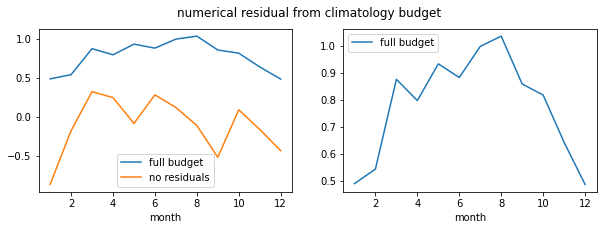

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
clim_budget.plot(ax=ax0, label='full budget')
clim_bdgt_nores.plot(ax=ax0, label='no residuals')

clim_budget.plot(ax=ax1, label='full budget')

ax0.legend()
ax1.legend()
plt.suptitle('numerical residual from climatology budget');

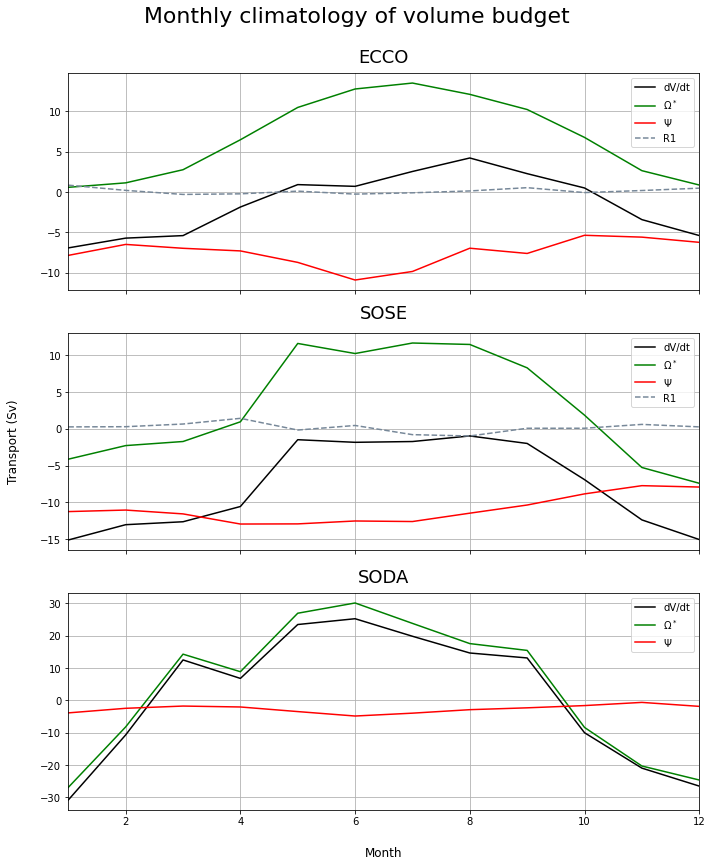

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,12), sharex=True)

bot_ecco.dVdt_clim.plot(label='dV/dt', color='k', ax=ax0)
(bot_ecco.omega_clim+bot_ecco.R2_clim).plot(label=r'$\Omega^*$', color='green', ax=ax0)
bot_ecco.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax0)
bot_ecco.R1_clim.plot(label='R1', color='lightslategray', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=11)
ax0.set_xlim(1, 12)

bot_sose.dVdt_clim.plot(label='dV/dt', color='k', ax=ax1)
(bot_sose.omega_clim+bot_sose.R2_clim).plot(label=r'$\Omega^*$', color='green', ax=ax1)
bot_sose.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax1)
bot_sose.R1_clim.plot(label='R1', color='lightslategray', linestyle='--', ax=ax1)
ax1.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=15)
ax1.set_xlabel('')
ax1.legend()
ax1.grid()

bot_soda.dVdt_clim.plot(label='dV/dt', color='k', ax=ax2)
bot_soda.omega_clim.plot(label=r'$\Omega^*$', color='green', ax=ax2)
bot_soda.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax2)
ax2.grid()
ax2.legend()
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('SODA', fontsize=18, pad=11)
ax2.set_xlabel('Month', fontsize=12, labelpad=20)

plt.suptitle('Monthly climatology of volume budget', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('clim-stacked.pdf');

## $\Omega$'s components

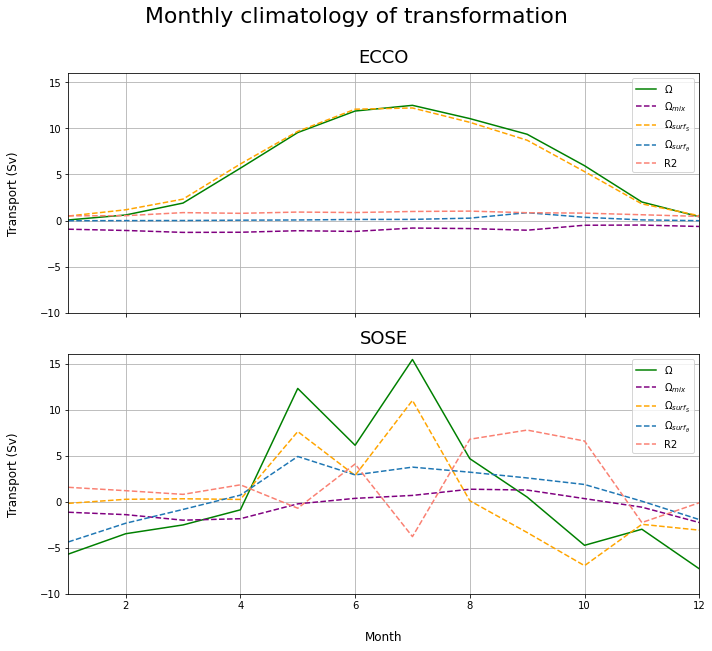

In [10]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,9), sharex=True)

bot_ecco.omega_clim.plot(label=r'$\Omega$', color='green', ax=ax0)
bot_ecco.omega_mix__clim.plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_slt_clim.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_th_clim.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax0)
bot_ecco.R2_clim.plot(label='R2', color='salmon', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=11)
ax0.set_ylim(-10,16)
ax0.set_xlim(1, 12)

bot_sose.omega_clim.plot(label=r'$\Omega$', color='green', ax=ax1)
bot_sose.omega_mix__clim.plot(label=r'$\Omega_{mix}$', color='purple', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_slt_clim.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_th_clim.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax1)
bot_sose.R2_clim.plot(label='R2', color='salmon', linestyle='--', ax=ax1)
ax1.grid()
ax1.legend()
ax1.set_xlabel('Month', fontsize=12, labelpad=20)
ax1.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=11)
ax1.set_ylim(-10,16)


plt.suptitle('Monthly climatology of transformation', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('clim-omegas-stacked.pdf');